In [19]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
iris=pd.read_csv("Iris.csv")

In [21]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.1+ KB


In [22]:
iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


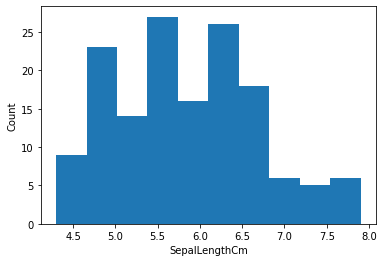

In [28]:
plt.hist(iris.SepalLengthCm)
plt.xlabel("SepalLengthCm")
plt.ylabel("Count")
plt.show()

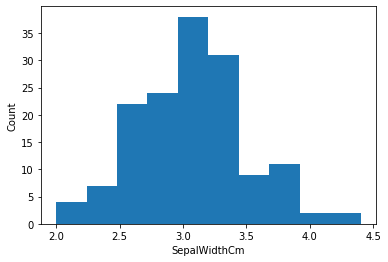

In [29]:
plt.hist(iris.SepalWidthCm)
plt.xlabel("SepalWidthCm")
plt.ylabel("Count")
plt.show()

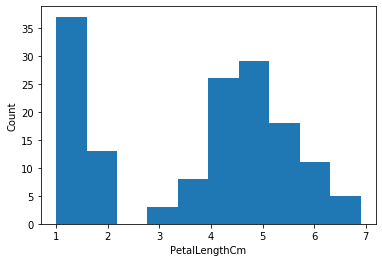

In [30]:
plt.hist(iris.PetalLengthCm)
plt.xlabel("PetalLengthCm")
plt.ylabel("Count")
plt.show()

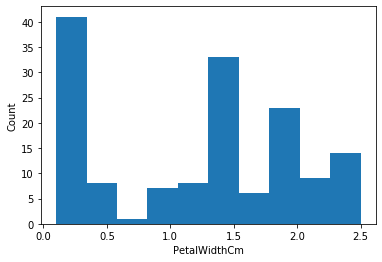

In [31]:
plt.hist(iris.PetalWidthCm)
plt.xlabel("PetalWidthCm")
plt.ylabel("Count")
plt.show()

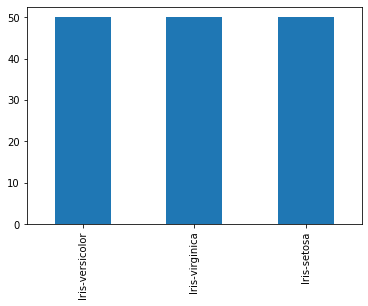

In [33]:
iris["Species"].value_counts().plot(kind='bar')
plt.show()

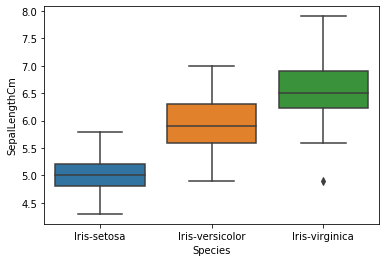

In [70]:
sns.boxplot(y=iris["SepalLengthCm"],x=iris.Species)
plt.show()

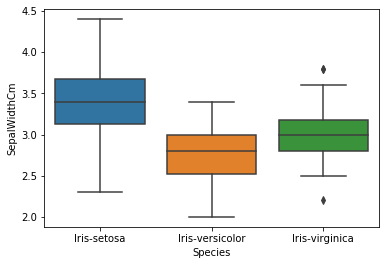

In [71]:
sns.boxplot(x=iris["Species"],y=iris.SepalWidthCm)
plt.show()

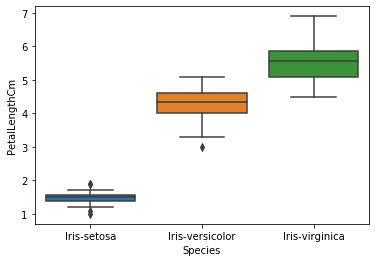

In [72]:
sns.boxplot(x=iris["Species"],y=iris.PetalLengthCm)
plt.show()

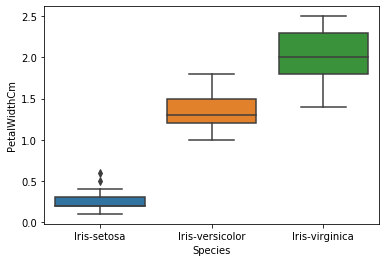

In [73]:
sns.boxplot(x=iris["Species"],y=iris.PetalWidthCm )
plt.show()

In [74]:
x= iris.drop(["Id"],axis=1)

In [75]:
cat_col = x.select_dtypes(include=['object']).columns
dummies = pd.get_dummies(x[cat_col],drop_first=True)
without_dummies = x.drop(cat_col,axis=1)

In [66]:
data = pd.concat([dummies,without_dummies],axis=1)

In [67]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Species_Iris-versicolor    150 non-null uint8
Species_Iris-virginica     150 non-null uint8
SepalLengthCm              150 non-null float64
SepalWidthCm               150 non-null float64
PetalLengthCm              150 non-null float64
PetalWidthCm               150 non-null float64
dtypes: float64(4), uint8(2)
memory usage: 5.1 KB


In [54]:
data.head(5)

,Species_Iris-versicolor,Species_Iris-virginica,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,0,0,5.1,3.5,1.4,0.2
1,0,0,4.9,3.0,1.4,0.2
2,0,0,4.7,3.2,1.3,0.2
3,0,0,4.6,3.1,1.5,0.2
4,0,0,5.0,3.6,1.4,0.2


In [68]:
y = data["Species_Iris-versicolor","Species_Iris-virginica"]
X = data.drop(["Species_Iris-versicolor","Species_Iris-virginica"],axis=1)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                    test_size=0.3,random_state=1)
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
ypred  = logreg.predict(X_test)
from sklearn import metrics
metrics.log_loss(y_test,ypred)

KeyError: ('Species_Iris-versicolor', 'Species_Iris-virginica')